In [8]:
# DR LI WAN | UNIVERSITY OF CAMBRIDGE
# MR SHANTONG WANG
# MS TIANYUAN WANG

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.lines as mlines
import matplotlib.patheffects as path_effects
from matplotlib.lines import Line2D
from matplotlib import cm

import plotly.express as px
import networkx as nx
from pyproj import Proj, transform 
from mpl_toolkits.basemap import Basemap as Basemap

import geopandas as gpd  # gpd.__version__  # gpd.show_versions()
import shapely
import shapely.geometry as geom
from shapely.geometry import LineString

In [9]:
from map_function import read_csv, flow_map

In [3]:
df = read_csv('with nodes coordinates.csv')
df

(2211, 9)


,OBJECTID,length_unit,magnitude,coord_x1,coord_y1,name_x1y1,coord_x2,coord_y2,name_x2y2
0,1,364.48618,3384.0,0.101681,52.159237,1a,0.098907,52.158174,1b
1,2,287.94352,3384.0,0.098907,52.158174,2a,0.096869,52.157197,2b
2,3,21.26571,826.0,0.102216,52.160129,3a,0.102196,52.160013,3b
3,4,84.85154,3797.0,0.102149,52.159589,4a,0.101681,52.159237,4b
4,5,77.06397,826.0,0.102196,52.160013,5a,0.102149,52.159589,5b
...,...,...,...,...,...,...,...,...,...
2206,2207,19.55846,2.0,0.049261,52.293250,2207a,0.049420,52.293205,2207b
2207,2208,0.13286,5.0,0.055653,52.291566,2208a,0.055654,52.291566,2208b
2208,2209,177.76883,3.0,0.054186,52.291953,2209a,0.055653,52.291566,2209b
2209,2210,17.90372,1.0,0.049420,52.293205,2210a,0.049568,52.293166,2210b


In [4]:
df1 = pd.read_csv('anpr.csv')

In [5]:
title = 'Cambridge Flow Map'
#subtitle = 'No. of commuters by mode - xxx in year xxx'

date = '22 Aug'
time = 'xxpm'
vehicle = 'xx'
location = 'Cambridge'

subtitle = location+' '+date+' '+time


cutoff1 = 0
cutoff2 = 1
cutoff3 = 100
cutoff4 = 2000
cutoff5 = 5000
color1 = 'lightgreen'
color2 = 'dodgerblue'
color3 = 'khaki'
color4 = 'orange'
color5 = 'orangered'

name1='name_x1y1'
name2='name_x2y2'

In [6]:
def flow_map(title,subtitle,
             cutoff1,cutoff2,cutoff3,cutoff4,cutoff5,
             color1,color2,color3,color4,color5):
    
#     global df

#     inProj = Proj(init = epsg_in) 
#     outProj = Proj(init= epsg_out)
#     df['long_x1y1'], df['lat_x1y1'] = transform(inProj, outProj, df[coord_x1].tolist(), df[coord_y1].tolist())
#     df['long_x2y2'], df['lat_x2y2'] = transform(inProj, outProj, df[coord_x2].tolist(), df[coord_y2].tolist())
 
#     df = df[df[magnitude] > minimumvalue]

#     title = 'Cambridge Flow Map'
#     subtitle = 'No. of commuters by mode - xxx in year xxx'

#     cutoff1 = 0
#     cutoff2 = 1
#     cutoff3 = 100
#     cutoff4 = 2000
#     cutoff5 = 5000
#     color1 = 'lightgreen'
#     color2 = 'dodgerblue'
#     color3 = 'khaki'
#     color4 = 'orange'
#     color5 = 'orangered'

    annotate1 = 'Cambridge'
    dpi = 300
    minimumvalue = 0

    magnitude = 'magnitude'
    name1='name_x1y1'
    coord_x1='coord_x1'
    coord_y1='coord_y1'
    name2='name_x2y2'
    coord_x2='coord_x2'
    coord_y2='coord_y2'
    service = 'Ocean_Basemap'
    epsg = 4326
    xpixels = 1500
    epsg_in = 'epsg:3857'
    epsg_out = 'epsg:4326'
    
    
    
    graph = nx.from_pandas_edgelist(df, name1, name2, edge_attr=magnitude)
    graph1 = nx.from_pandas_edgelist(df1, 'Name', 'Name')

    df_name1 = df[[name1,'coord_x1','coord_y1']].rename(columns={name1:'name', 'coord_x1':'long', 'coord_y1':'lat'}).drop_duplicates()
    df_name2 = df[[name2,'coord_x2','coord_y2']].rename(columns={name2:'name', 'coord_x2':'long', 'coord_y2':'lat'}).drop_duplicates()
    df_name = pd.concat([df_name1, df_name2], ignore_index=True, sort=False).drop_duplicates()    
    
        
    # llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon are the lat/lon values of the lower left and upper right corners of the map.
    fig = plt.figure(figsize = (9,7), dpi = dpi)
    fig.patch.set_facecolor('#f5f5f5') ##e9e9e9 #black
    ax = fig.add_subplot(1,1,1)
    
    m = Basemap(projection='merc', resolution='i', #epsg=epsg,
            llcrnrlon=df_name['long'].min()-0.04, 
            llcrnrlat=df_name['lat'].min()-0.005, 
            urcrnrlon=df_name['long'].max()+0.04, 
            urcrnrlat=df_name['lat'].max()+0.005,
            lat_ts=df_name['lat'].mean(),
            suppress_ticks=True)
   
    #m.readshapefile(r'cambridge planning/roadnew', 'roads', drawbounds=True, linewidth=0.3, color='#4C4C4C', zorder=0)
    m.readshapefile(r'gadm36_GBR_shp/gadm36_GBR_3', 'states', drawbounds=True, linewidth=0.3, color='#4C4C4C', zorder=0)
    #m.arcgisimage(service=service, xpixels = 1500, verbose= False)


    mx, my = m(df_name['long'].values, df_name['lat'].values)
    pos = {}
    for count, elem in enumerate (df_name['name']):
        pos[elem] = (mx[count], my[count])
    
    mx1, my1 = m(df1['X'].values, df1['Y'].values)
    pos1 = {}
    for count, elem in enumerate (df1['Name']):
        pos1[elem] = (mx1[count], my1[count])
        

    
    durations = [np.log(i[magnitude]*0.01) for i in dict(graph.edges).values()]
    
    
    nx.draw_networkx_nodes(G = graph1, pos = pos1, nodelist = graph1.nodes(),
                            node_shape='o', node_color = '#ababab',   #898c8f #c0d0e1
                            alpha = 0.5, node_size =12, linewidths=0.5, edgecolors = '#151515')
    

    nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = graph.nodes(),
                            node_shape='o', node_color = '#898c8f',   #c0d0e1
                            alpha = 0.5, node_size =0)

    nx.draw_networkx_edges(G = graph, pos = pos, edgelist = [edge for edge in graph.edges(data=True) if (edge[2][magnitude] >= cutoff1)&(edge[2][magnitude] < cutoff2)],
                            edge_color = color1, label = '%.0f - %.0f'%(cutoff1,cutoff2),
                            width=2, #width=durations,
                            alpha=0.35, arrows = False)

    nx.draw_networkx_edges(G = graph, pos = pos, edgelist = [edge for edge in graph.edges(data=True) if (edge[2][magnitude] >= cutoff2)&(edge[2][magnitude] < cutoff3)],
                            edge_color = color2, label= '%.0f - %.0f'%(cutoff2,cutoff3),
                            width=2, #width=durations,
                            alpha=0.35, arrows = False)

    nx.draw_networkx_edges(G = graph, pos = pos, edgelist = [edge for edge in graph.edges(data=True) if (edge[2][magnitude] >= cutoff3)&(edge[2][magnitude] < cutoff4)],
                            edge_color = color3, label= '%.0f - %.0f'%(cutoff3,cutoff4),
                            width=2, #width=durations,
                            alpha=0.5, arrows = False)

    nx.draw_networkx_edges(G = graph, pos = pos, edgelist = [edge for edge in graph.edges(data=True) if (edge[2][magnitude] >= cutoff4)&(edge[2][magnitude] < cutoff5)],
                            edge_color = color4, label= '%.0f - %.0f'%(cutoff4,cutoff5),
                            width=2, #width=durations,
                            alpha=0.75, arrows = False)

    nx.draw_networkx_edges(G = graph, pos = pos, edgelist = [edge for edge in graph.edges(data=True) if edge[2][magnitude] >= cutoff5],
                            edge_color = color5, label= '> %.0f'%(cutoff5),
                            width=2, #width=durations,
                            alpha=0.9, arrows = False)
                            
    
    m.drawcountries(linewidth = 0.3)
    #m.drawcoastlines(linewidth=0.5)      #not work in Binder - but no difference, just dropped this line
    m.fillcontinents(alpha = 0.05,zorder=0)

    plt.legend(loc = 'lower right',prop={'size':7})

    # text = plt.annotate(annotate1, m((df_name['long'].mean()),(df_name['lat'].mean())), color='#232323', 
    #                     fontsize=10, fontname='Arial', ha='center', va='center') 
    # text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='whitesmoke'), path_effects.Normal()])

    
    ax.text(0, 1.05, title , transform=ax.transAxes, size=13, weight=600, ha='left', color = 'gray')
    ax.text(0, 1.02, subtitle , transform=ax.transAxes, size=7, color='gray') #weight=600, ha='left')'lightgray'

    #plt.savefig("./flow map.jpeg", format = "jpeg", dpi = 300)
    ax.axis('off')
    plt.show()



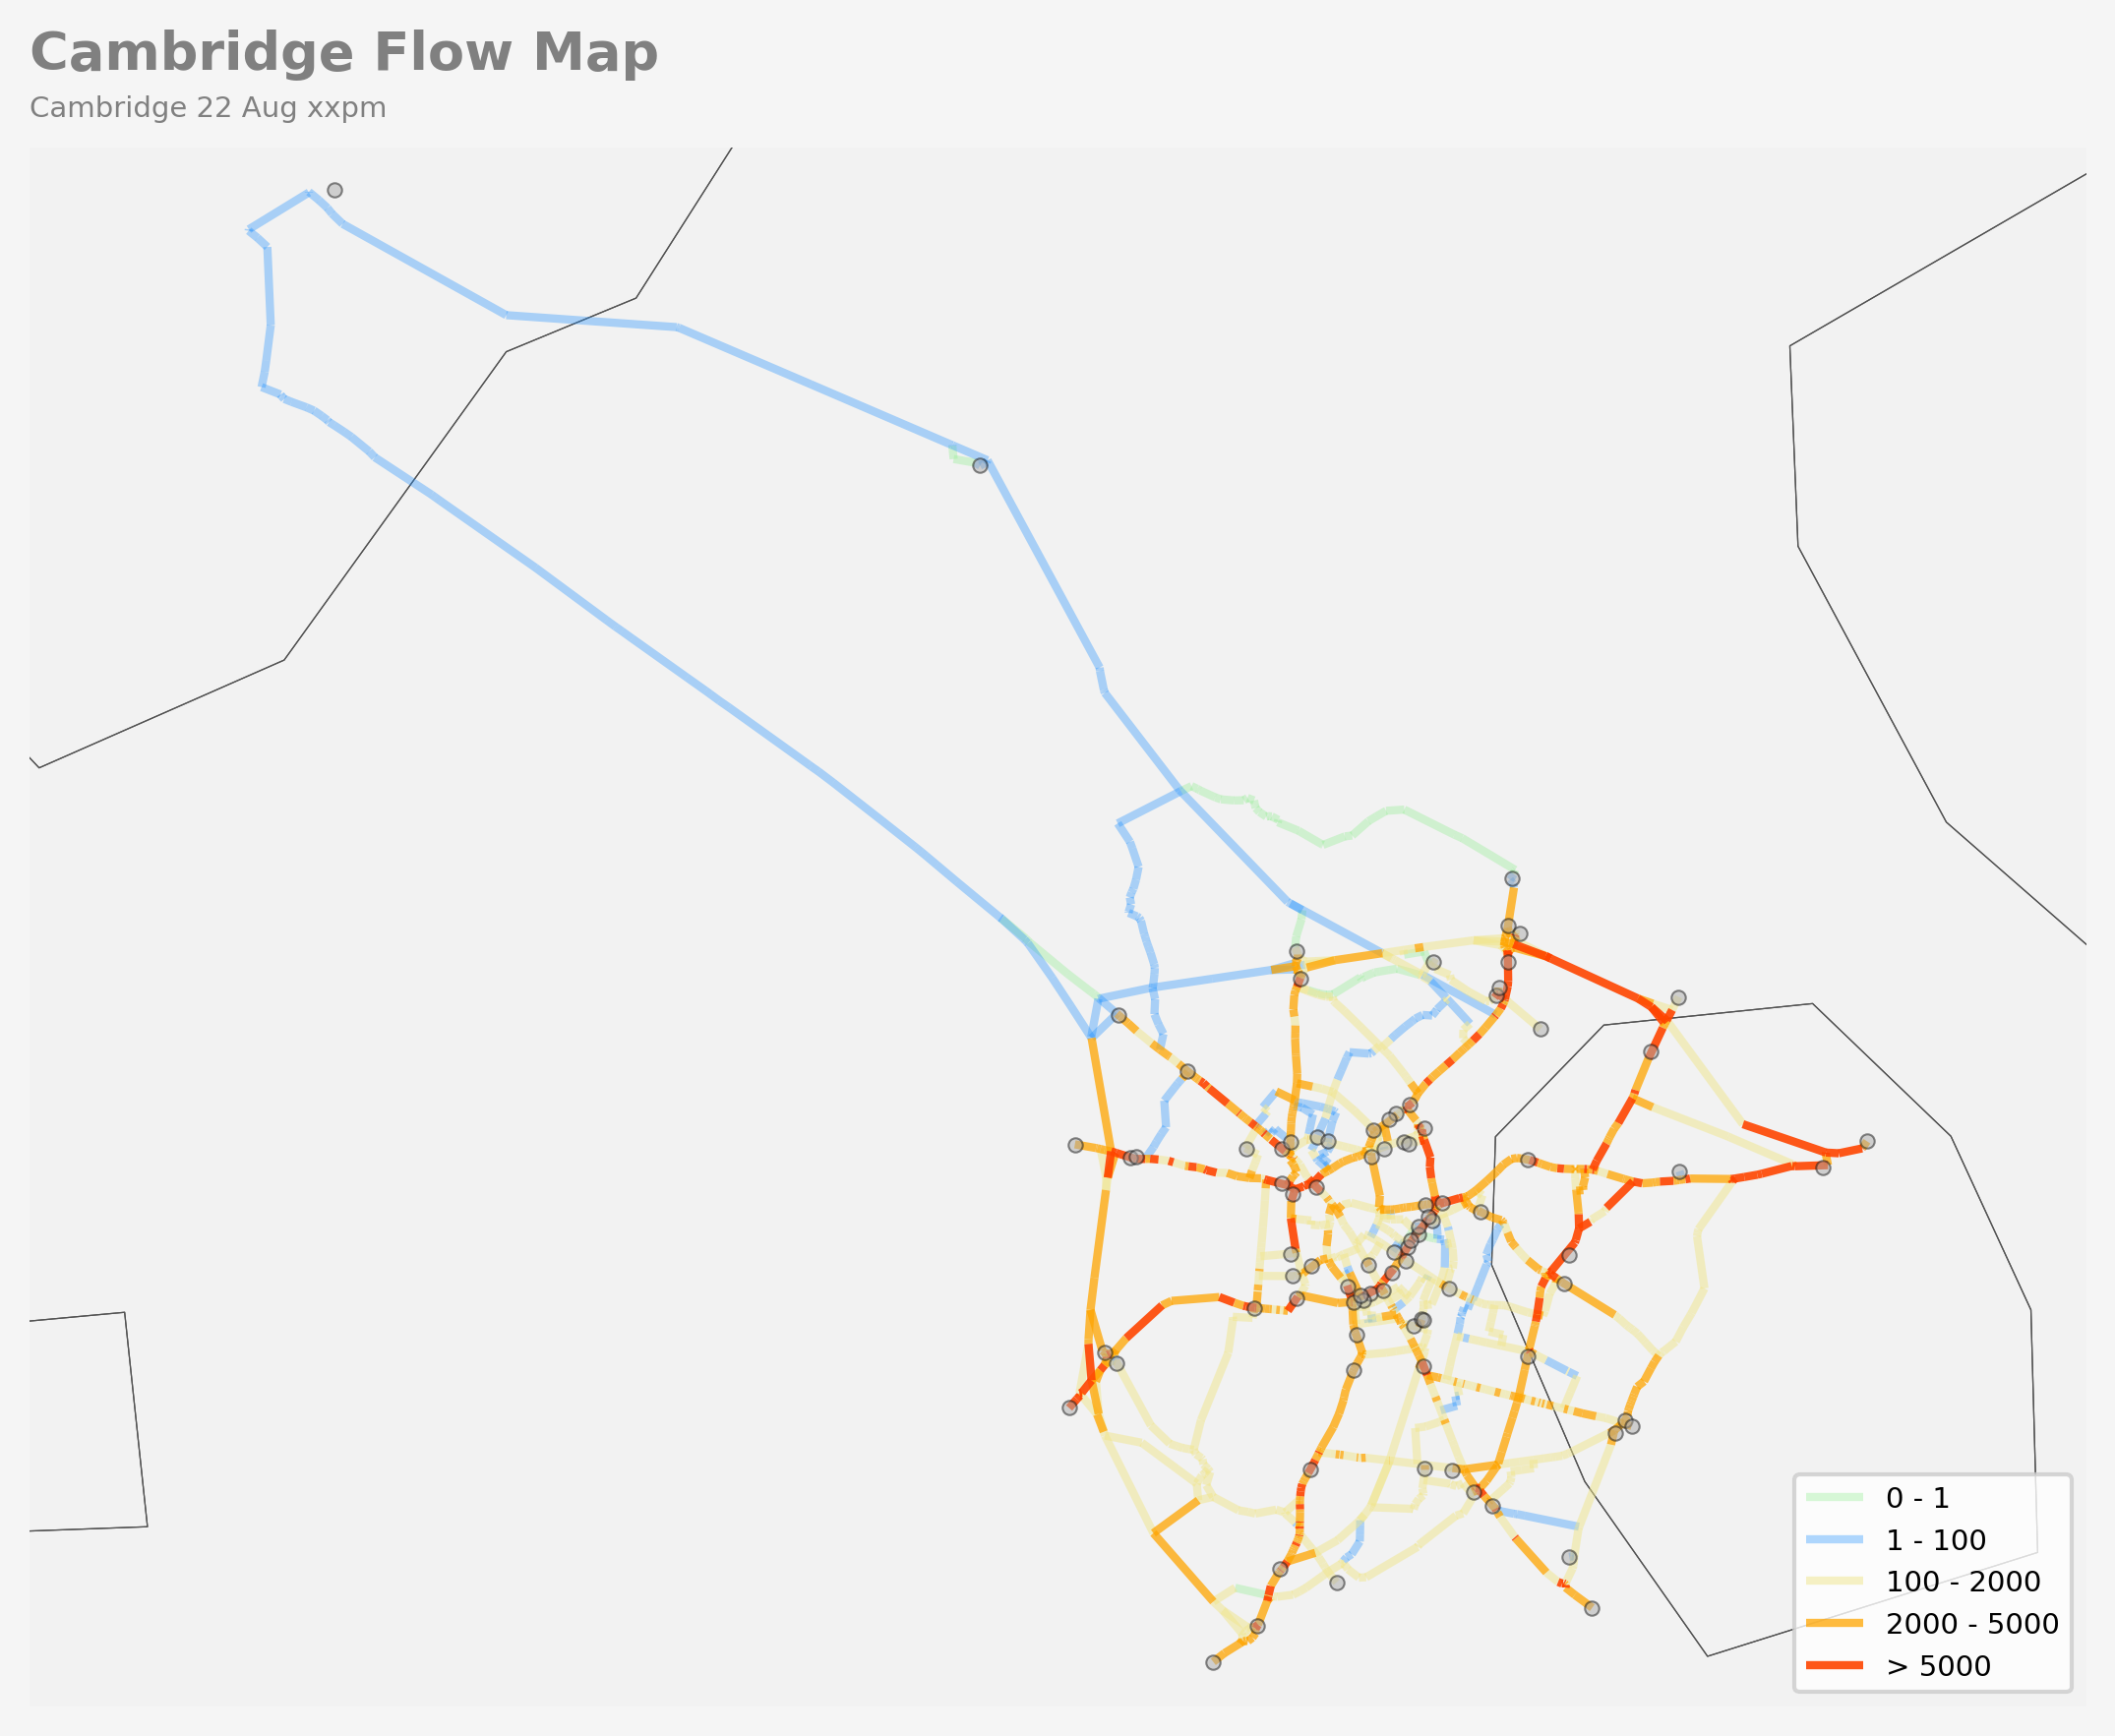

In [7]:
flow_map(title,subtitle,
         cutoff1,cutoff2,cutoff3,cutoff4,cutoff5,
         color1,color2,color3,color4,color5)

In [6]:
a[]

SyntaxError: invalid syntax (<ipython-input-6-f195c1342970>, line 1)

In [ ]:
# gpd.show_versions()

In [ ]:
# %load_ext watermark
# %watermark --iversions
# %watermark -v -m -p numpy,pandas,mpl_toolkits.basemap,pyproj,pyshp